Sample with (width, height): (25.0, 32.0) classified as pikachu
Sample with (width, height): (24.2, 31.5) classified as pikachu
Sample with (width, height): (22.0, 34.0) classified as pikachu
Sample with (width, height): (20.5, 34.0) classified as pichu


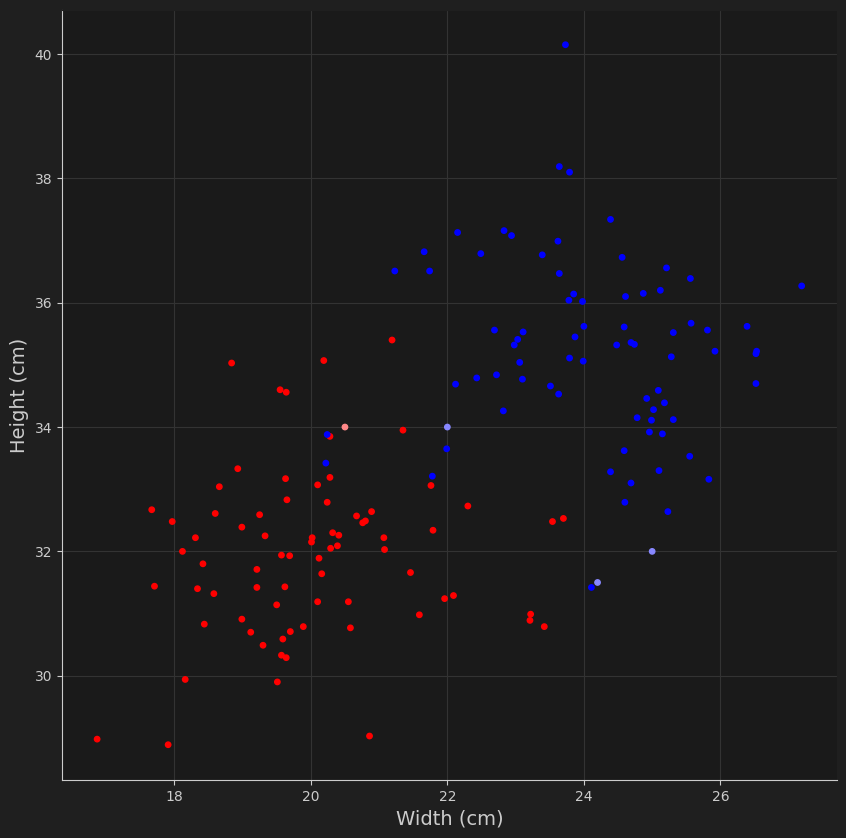

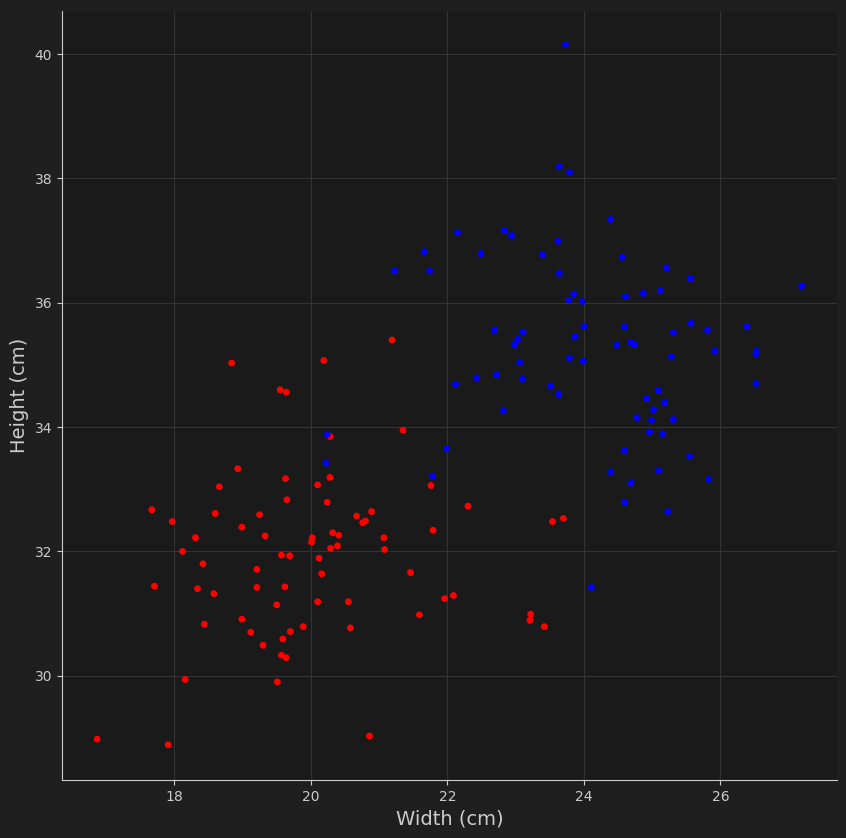

In [241]:
# Grunduppgift : Läs In Data, Räkna Ut Närmsta Granne, Labla Testdatan, Scatter Plott
import matplotlib.pyplot as plt
import numpy as np
import re
 

# next  : skips the first line in the text file
# Regex : I use it to seperate the string data thus you can use the same function for
#         the datapoints as well a the testpoints by simply swich out the path and expression,
#         even though this approch ended up being more complicated and lesse efficient than
#         simply making two seperate functions.
# guess : When I check for closest neighbour(s) I add the classification to guess rather then to the label
# color : I give the data points a color value directly, all though color value of the testpoint
#         data is changed once classified 
def read_data(path, expression):
    creature = list()
    with open(path, "r") as file:
        next(file)
        for line in file.readlines():
            group = re.findall(expression, line)[0]
            creature.append( { 
                "width": round(float(group[0]), 2),
                "height": round(float(group[1]), 2),
                "label": None if len(group) < 3 else int(group[2]),
                "guess": None,
                "color": "#ffffff" if len(group) < 3 else "#0000ff" if int(group[2]) else "#ff0000",
                #"marker_size": 40
                } )
    return creature




def euclidean_sort(labeld_point, test_point, ):
    tpw = test_point["width"]
    tph = test_point["height"]
    lpw = labeld_point["width"]
    lph = labeld_point["height"]
    return np.sqrt( (tpw - lpw)**2 + (tph - lph)**2 ) 

# This function can sort both by closest neighbour and by closest group of ten 
# by simply setting the 'neighbours' parameters to 1 or 10 respectively
def closest_neighbour(neighbours, points_test, points):
    
    for key, test_point in enumerate(points_test):       
        # Sorts the point list based on euclidean distance and save them in a list
        closest_points = sorted(points, key=lambda labeled_point: euclidean_sort(labeled_point, test_point) )[:neighbours]
        # Counts the number of points that are pikachu / pichu in the list
        pikachu = pichu = 0
        [ (pikachu:=pikachu+1) if point["label"] == 1 else (pichu:=pichu+1) for point in closest_points ]
        # Sets the label to pikachu / pichu based on majority, if equal then it picks based on the first closest point
        if pikachu > pichu:
            points_test[key]["guess"] = 1
        elif pichu < pikachu:
            points_test[key]["guess"] = 0
        else:
            points_test[key]["guess"] = closest_points[0]["label"]
    return points_test

# Used to set the color of the test points once they have been classified
# I use a lighter red and a lighter blue so you can see which once are 
# test colors on the scatter plot
def set_color( points ):
    for e in range(len(points)):
        points[e]["color"] = "#ff8888" if points[e]["guess"] == 0 else "#8888ff"
    return points

# Returns a string that contains the cordinates and new lable of the points that has been tested
def get_classification( points ):
    return "\n".join([ f"Sample with (width, height): {(obj["width"], obj["height"])} classified as {get_label(obj["guess"])}" for obj in points])
    

def get_label(label_number):
    return "pikachu" if label_number else "pichu" 


def plot(creature):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)


    ax.set_facecolor((0.1, 0.1, 0.1))
    ax.tick_params(axis='x', colors=(0.8, 0.8, 0.8))
    ax.tick_params(axis='y', colors=(0.8, 0.8, 0.8))
    ax.yaxis.label.set_color((0.8, 0.8, 0.8))
    ax.xaxis.label.set_color((0.8, 0.8, 0.8))
    ax.spines['bottom'].set_color((0.8, 0.8, 0.8))
    ax.spines['left'].set_color((0.8, 0.8, 0.8))
    ax.spines['top'].set_color((0.12, 0.12, 0.12))
    ax.spines['right'].set_color((0.12, 0.12, 0.12))
    fig.set_facecolor((0.12, 0.12, 0.12))

    plt.grid(visible=None, which='major', axis='both', color=(0.2, 0.2, 0.2))
    
    # I chose to add the color to each individual point rather then adding them in two seperate scatter 
    # plots, its probably less efficient but it allows you to have a unique color 
    # for each point.
    plt.scatter([e["width"] for e in creature], [e["height"] for e in creature], color=[e["color"] for e in creature], marker=".", s=60, zorder=2)
    plt.ylabel("Height (cm)", fontsize=14, color=(0.8, 0.8, 0.8))
    plt.xlabel("Width (cm)", fontsize=14, color=(0.8, 0.8, 0.8))
    plt.show()



def main():
    creature = read_data("datapoints.txt", r"(\d.*?), (\d.*?), (\d)")
    #print(creature[0])
    creature_test = read_data("testpoints.txt", r"\((\d.*?), (\d.*)\)")
    #print(creature_test[0])
    #creature += creature_test
    creature_test = closest_neighbour(1,creature_test, creature)
    creature_test = set_color(creature_test)
    #print(creature_test)
    #creature += creature_test
    print(get_classification(creature_test))
    plot(creature+creature_test)
    """
    creature = { "pikachu":list(), "pichu":list() }
    reature_divided = dict()
    creature_divided_test = dict()  
    accuracy_data = dict( tp=0, tn=0, fp=0, fn=0 )

    creature = read_data(creature)
    
    for e in range(4 ):
        creature_divided, creature_divided_test = shuffle_data(creature)
        #print(len(creature_divided), len(creature_divided_test))
        creature_divided_test = closest_majority(creature_divided_test, creature_divided)
        accuracy_data = evaluation(creature_divided_test, accuracy_data) 

    """    
    #for e in creature_divided_test:
        #print(f"True:{e["label"]} | Guess:{e["guess"]}")
    #accuracy = accuracy_test(accuracy_data)
    #print(f"True:{accuracy[0]}%, False:{accuracy[1]}%")
    

main()

Sample with (width, height): (21.0, 35.5) classified as pichu


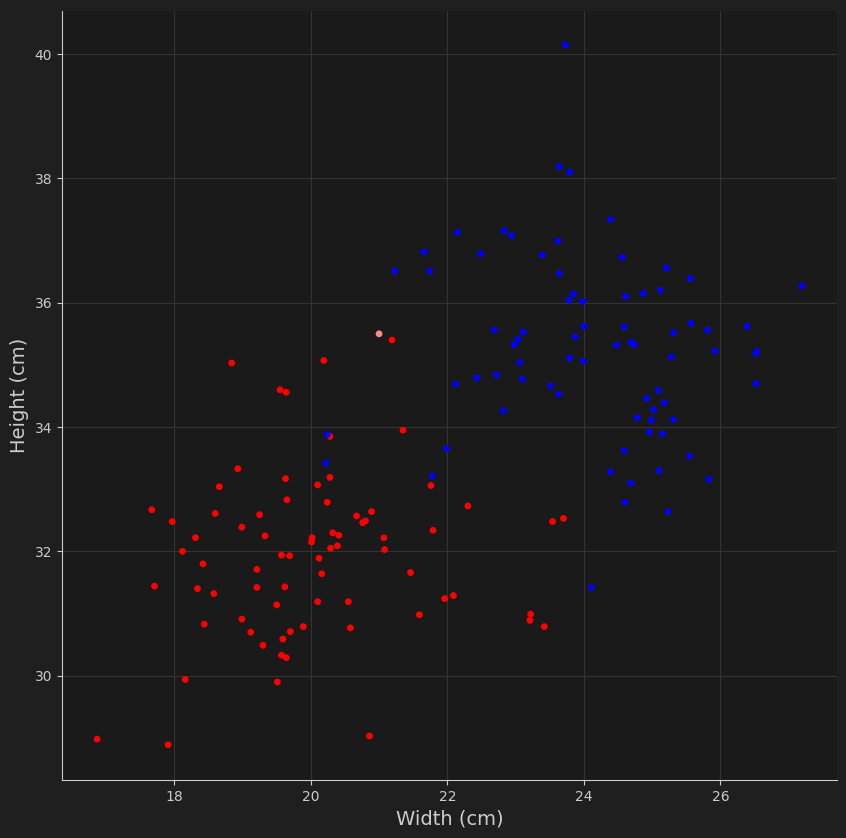

Sample with (width, height): (21.0, 35.5) classified as pikachu


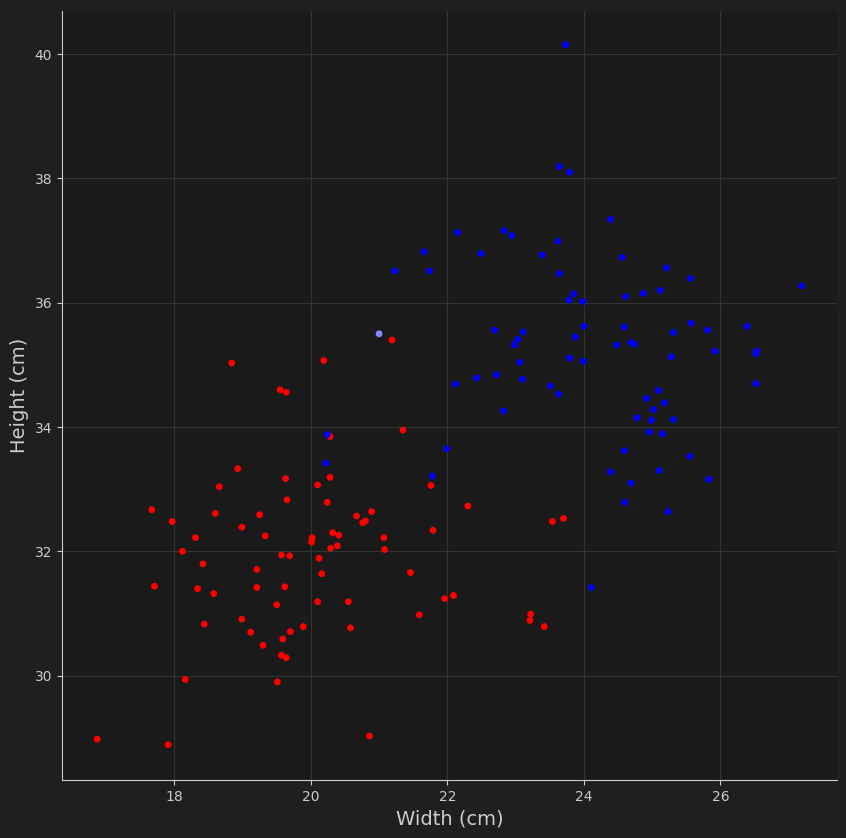

In [267]:
# Uppgift 1 - 2 : Användar Input, Närmsta Grupp

# Error Handling
def user_input(message:str)->float:
    user_input = input(message) 
    while not user_input.replace(".","").isnumeric() :
        user_input = input(f"Your input is not valid, pleas input a positive number that is either whole or decimal.\n {message}") 
    return float(user_input)

# Allows the user to add a new creature
def user_creature():
    return [{ 
        "width":user_input("Input Width: "), 
        "height":user_input("Input Height: "), 
        "label":None, "guess":None, 
        "color":"#ffffff" }]



def main():
    creature = read_data("datapoints.txt", r"(\d.*?), (\d.*?), (\d)")
    new_creature = user_creature()
    
    # Closest Neighbour
    new_creature = closest_neighbour(1, new_creature , creature)
    new_creature = set_color(new_creature)
    print(get_classification(new_creature))
    plot(creature+new_creature)

    # Closest Group
    new_creature = closest_neighbour(10, new_creature , creature)
    new_creature = set_color(new_creature)
    print(get_classification(new_creature))
    plot(creature+new_creature)
 

main()



In [ ]:
# Uppgift 3 - 4
import numpy as np
from random import shuffle 



def read_data(creature):
    with open("datapoints.txt", "r") as file:
        next(file)
        for n, e in enumerate(file.readlines()):
            line = e.split(", ")
            label = "pikachu" if int(line[2][:-1]) else "pichu"
            creature[label].append(  { 
                "height": round(float(line[1]), 2),
                "width": round(float(line[0]), 2),
                "label": label,
                "guesse": None,
                #"color": "#0000ff" if int(line[2][:-1]) else "#ff0000",
                #"marker_size": 40
                } )
    return creature

def shuffle_data(creature):
    shuffle(creature["pikachu"])
    shuffle(creature["pichu"])
    creature_divided = creature["pikachu"][:50] + creature["pichu"][:50]
    creature_divided_test = creature["pikachu"][50:] + creature["pichu"][50:]
    # Need to shuffle it one more time because if the points are tide then it 
    # will chose the FIRST closest point and because all pikachus are added before
    # the pichus the pikachus will always be chosen before the pichus
    shuffle(creature_divided)
    #print(len(creature_divided_test))
    return creature_divided, creature_divided_test


#print(creature_divided_test)

def euclidean_sort(labeld_point, test_point, ):
   # print(labeld_point)
    tpw = test_point["width"]
    tph = test_point["height"]
    lpw = labeld_point["width"]
    lph = labeld_point["height"]
    return np.sqrt( (tpw - lpw)**2 + (tph - lph)**2 ) 
  

def closest_majority(points_test, points):
    
    for key, test_point in enumerate(points_test):       
        # Sorts the point list based on euclidean distance and save them in a list
        closest_points = sorted(points, key=lambda labeled_point: euclidean_sort(labeled_point, test_point) )[:10]
        # Counts the number of points that are pikachu res pichu in the list
        pikachu = pichu = 0
        [ (pikachu:=pikachu+1) if point["label"] == "pikachu" else (pichu:=pichu+1) for point in closest_points ]
        # Sets the label ro pikachu / pichu based on majority, if equal then picks based on the first closest point
        if pikachu > pichu:
            points_test[key]["guess"] = "pikachu"
        elif pichu < pikachu:
            points_test[key]["guess"] = "pichu"
        else:
            points_test[key]["guess"] = closest_points[0]["label"]
    return points_test
    





def evaluation(creature_divided_test, accuracy_data):
    for obj in creature_divided_test:
        if obj["label"] == "pikachu" and obj["guess"] == "pikachu":
            accuracy_data["tp"] += 1 
        elif obj["label"] == "pichu" and obj["guess"] == "pichu":
            accuracy_data["tn"] += 1
        elif obj["label"] == "pikachu" and obj["guess"] == "pichu":
            accuracy_data["fp"] += 1
        elif obj["label"] == "pichu" and obj["guess"] == "pikachu":
            accuracy_data["fn"] += 1     

    return accuracy_data

def accuracy_test(accuracy_data):
    div = 100/sum( [obj for obj in accuracy_data.values()] )
    return (div*accuracy_data["tp"]+div*accuracy_data["tn"], div*accuracy_data["fp"]+div*accuracy_data["fn"])



def main():
    creature = { "pikachu":list(), "pichu":list() }
    creature_divided = dict()
    creature_divided_test = dict()  
    accuracy_data = dict( tp=0, tn=0, fp=0, fn=0 )

    creature = read_data(creature)
    
    for e in range(4 ):
        creature_divided, creature_divided_test = shuffle_data(creature)
        #print(len(creature_divided), len(creature_divided_test))
        creature_divided_test = closest_majority(creature_divided_test, creature_divided)
        accuracy_data = evaluation(creature_divided_test, accuracy_data) 

        
    #for e in creature_divided_test:
        #print(f"True:{e["label"]} | Guess:{e["guess"]}")
    accuracy = accuracy_test(accuracy_data)
    print(f"True:{accuracy[0]}%, False:{accuracy[1]}%")
    

main()

True:94.5%, False:5.5%
